In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv("2007.csv")

In [3]:
data.shape

(7453215, 29)

In [4]:
#Variable descriptions:
#1 Year 1987-2008 
#2 Month 1-12
#3 DayofMonth 1-31
#4 DayOfWeek 1 (Monday) - 7 (Sunday) 
#5 DepTime actual departure time (local, hhm m)
#6 CRSDepTime scheduled departure time (local, hhmm)
#7 ArrTime actual arrival time (local, hhmm) 
#8 CRSArrTime scheduled arrival time (local, hhmm)
#9 UniqueCarrier unique carrier code 
#10 FlightNum flight number 
#11 TailNum plane tail number 
#12 ActualElapsedTime in minutes 
#13 CRSElapsedTime in minutes 
#14 AirTime in minutes 
#15 ArrDelay arrival delay, in minutes 
#16 DepDelay departure delay, in minutes
#17 Origin origin IATA airport code 
#18 Dest des tination IATA airport code 
#19 Distance in miles
#20 TaxiIn taxi in time, in minutes 
#21 TaxiOut taxi out time in minutes
#22 Cancelled was the flight cancelled?
#23 CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
#24 Diverted 1 = yes, 0 = no 
#25 CarrierDelay in minutes 
#26 WeatherDelay in minutes 
#27 NASDelay in minutes 
#28 SecurityDelay in minutes 
#29 LateAircraftDelay in minutes

In [5]:
#Checking for null values
data.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
ArrTime               177927
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [6]:
data["CancellationCode"].value_counts(dropna=False)

NaN    7292466
A        66779
B        61936
C        31995
D           39
Name: CancellationCode, dtype: int64

In [7]:
# filtering out unnecessary columns
# flights_needed_data=flights_needed_data.drop(['Year','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
#                                               'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
#                                               'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
#                                              axis=1)

In [8]:
#Dealing with NaN values

In [9]:
# 2. (CarrierDelay	WeatherDelay NASDelay	SecurityDelay	LateAircraftDelay) bar chart
# 3. (Distance vs Arrival Delay)
# 4. (Which airlines contribute more delay)
# 5. Contributions of each airline
# 6. Which day of the week the flight delays are minimum?
# 1. Predict ArrDelay (ML)


In [10]:
#Deleting unnecessary columns
data=data.drop(['CancellationCode','Cancelled'],axis=1)


In [11]:
data.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              160748
CRSDepTime                0
ArrTime              177927
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                  22
ActualElapsedTime    177927
CRSElapsedTime          994
AirTime              177927
ArrDelay             177927
DepDelay             160748
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [12]:
#Since there is no values for DepTime and ArrTime, we cannot assume any data. So, I am deleting all the rows with Nan
data=data.dropna(axis=0)

In [13]:
data.shape

(7275288, 27)

In [14]:
data.to_csv('datacleaned.csv')

In [15]:
#Again removing the unnecessary data
data=data.drop(['Year','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','TaxiIn','TaxiOut','Diverted'],axis=1)

In [16]:
data.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,1,1,WN,1.0,7.0,SMF,ONT,389,0,0,0,0,0
1,1,1,1,WN,8.0,13.0,SMF,PDX,479,0,0,0,0,0
2,1,1,1,WN,34.0,36.0,SMF,PDX,479,3,0,0,0,31
3,1,1,1,WN,26.0,30.0,SMF,PDX,479,23,0,0,0,3
4,1,1,1,WN,-3.0,1.0,SMF,PDX,479,0,0,0,0,0


In [17]:
# creating a new column; To know whether the flight delayed or not
delay=[]
for row in data['ArrDelay']:
  if row > 10:
    delay.append(1)
  else:
    delay.append(0)  

data['ArrivalDelayStatus'] = delay


In [18]:
data.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrivalDelayStatus
0,1,1,1,WN,1.0,7.0,SMF,ONT,389,0,0,0,0,0,0
1,1,1,1,WN,8.0,13.0,SMF,PDX,479,0,0,0,0,0,0
2,1,1,1,WN,34.0,36.0,SMF,PDX,479,3,0,0,0,31,1
3,1,1,1,WN,26.0,30.0,SMF,PDX,479,23,0,0,0,3,1
4,1,1,1,WN,-3.0,1.0,SMF,PDX,479,0,0,0,0,0,0


In [19]:
data.to_csv('datacleanedstatus.csv')

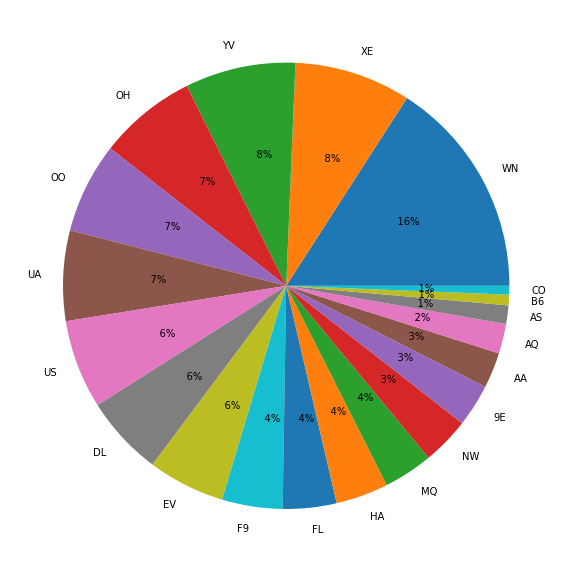

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
     

axis = plt.subplots(figsize=(10,14))
Name = data["UniqueCarrier"].unique()
size = data["UniqueCarrier"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()
     


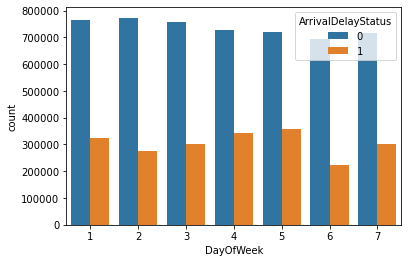

In [21]:
sns.countplot(x="DayOfWeek",hue="ArrivalDelayStatus",data=data)

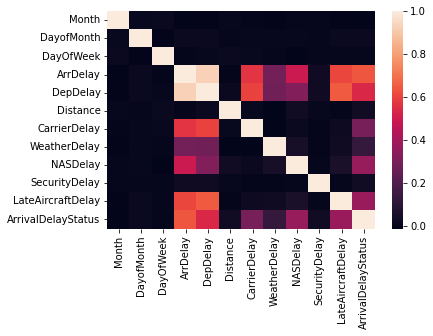

In [22]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=False)
plt.show()

In [23]:
correlations_matrix

,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrivalDelayStatus
Month,1.000000,0.010899,0.014225,-0.009981,-0.008126,0.004832,-0.001906,-0.006156,-0.000016,-0.000127,-0.006276,-0.011498
DayofMonth,0.010899,1.000000,-0.005743,0.016101,0.015818,0.000782,0.006897,0.004856,0.004003,0.001123,0.012888,0.013828
DayOfWeek,0.014225,-0.005743,1.000000,-0.002110,0.005875,0.013718,0.009550,-0.000458,-0.012520,0.002799,-0.000251,0.002446
ArrDelay,-0.009981,0.016101,-0.002110,1.000000,0.931503,-0.001717,0.569985,0.284733,0.491124,0.030310,0.611300,0.640364
DepDelay,-0.008126,0.015818,0.005875,0.931503,1.000000,0.017428,0.604154,0.281525,0.322382,0.030301,0.648730,0.538311
Distance,0.004832,0.000782,0.013718,-0.001717,0.017428,1.000000,0.009557,-0.009071,0.033570,0.004347,-0.004530,0.034180
CarrierDelay,-0.001906,0.006897,0.009550,0.569985,0.604154,0.009557,1.000000,-0.009656,0.018406,-0.003159,0.019658,0.292392
WeatherDelay,-0.006156,0.004856,-0.000458,0.284733,0.281525,-0.009071,-0.009656,1.000000,0.047096,-0.001637,0.027558,0.126176
NASDelay,-0.000016,0.004003,-0.012520,0.491124,0.322382,0.033570,0.018406,0.047096,1.000000,0.002301,0.056755,0.368869
SecurityDelay,-0.000127,0.001123,0.002799,0.030310,0.030301,0.004347,-0.003159,-0.001637,0.002301,1.000000,0.002631,0.034477


In [24]:
#From the correlation heatmap above, the Dep Delay and Arr Delay are highly correlated. So one of the columns can be further deleted.
data=data.drop(['DepDelay'],axis=1)

In [25]:
data.shape

(7275288, 14)

## Logistics Regression

In [26]:
y = data['ArrivalDelayStatus']
X = data.drop(['ArrivalDelayStatus','DayofMonth','Origin','Dest','UniqueCarrier'], axis=1)


In [27]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=167)

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the data using Minmaxscaler
transformer = MinMaxScaler().fit(X_train)# need to keep transformer
X_train_normalized = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.columns = X_train.columns
X_train_norm.head()

,Month,DayOfWeek,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.454545,0.000000,0.103093,0.086245,0.0,0.0,0.0,0.0,0.0
1,0.181818,0.666667,0.110997,0.118158,0.0,0.0,0.0,0.0,0.0
2,0.818182,0.333333,0.104467,0.288225,0.0,0.0,0.0,0.0,0.0
3,0.909091,0.333333,0.110653,0.022420,0.0,0.0,0.0,0.0,0.0
4,0.818182,0.833333,0.101031,0.366391,0.0,0.0,0.0,0.0,0.0


In [30]:
# Modeling the training set
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='auto').fit(X_train_norm, y_train) 

/Users/jasper/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#Scaling the X test
X_test_normalized = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_normalized)


In [33]:
# Predictions
predictions = classification.predict(X_test_norm)
classification.score(X_test_norm, y_test)
0.675

/Users/jasper/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/jasper/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.675